# **Decision Tree (Regression)**
Decision tree regression is a machine learning algorithm that uses a tree-like structure to predict continuous numerical values, such as house prices or temperatures. Unlike classification trees which predict categories, regression trees recursively split data into smaller, more homogeneous subsets based on features to minimize prediction errors. 

> Don't do this before Decision tree classification

## The working
In Decision tree, we have used to methods like Information Gain, entropy and Gini index while classification. But in regression, we don't use all this to split! Instead, we use a method called **Variance reduction**! That checks the variance of data at each step and chooses the split with highest variance reduction.

The formula of variance reduction is:
$$ Var(root)-\sum _{i=1}^{k}\frac{n_{i}}{N}\times Var(child_{i}) $$
$$ Var(root) = The\ parent\ node,\ or\ whole\ dataset\ (for\ first\ split) $$
$$ n_{i} = The\ number\ of\ samples\ in\ the\ child_{i} $$
$$ N = The\ number\ of\ samples\ in\ the\ root $$
$$ k = The\ number\ of\ child\ created\ by\ the\ split $$

Formula of Variance:
$$ Var = \sum^{n}_{i=1} \frac{(y-ŷ)²}{n} $$
$$ ŷ = The\ mean\ of\ whole\ dataset. $$
$$ n = The\ number\ of\ samples\ in\ the\ child $$

This process continues of every subtree until the data is splitted properly.

## How prediction is made?
When a new input comes, it reaches a leaf node based on the splits in the tree. The final output is the **mean** of all the values in that leaf node.

## Implementaion

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
# load a data set of training
from sklearn.datasets import load_diabetes
data = load_diabetes()
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [97]:
# make dataframe for better representation
X, y = pd.DataFrame(data['data'], columns=['age', 'sex', 'body mass index', 'average blood pressure', 's1', 's2', 's3', 's4', 's5', 's6']), data['target']
X

,age,sex,body mass index,average blood pressure,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [98]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
# train the model
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(max_depth=4)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.9, 'x[2] <= 0.005\nsquared_error = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.25, 0.7, 'x[8] <= 0.006\nsquared_error = 3735.274\nsamples = 197\nvalue = 119.787'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[8] <= -0.043\nsquared_error = 2507.936\nsamples = 140\nvalue = 101.514'),
 Text(0.0625, 0.3, 'x[4] <= -0.039\nsquared_error = 1500.028\nsamples = 45\nvalue = 80.289'),
 Text(0.03125, 0.1, 'squared_error = 1754.13\nsamples = 26\nvalue = 93.846'),
 Text(0.09375, 0.1, 'squared_error = 556.615\nsamples = 19\nvalue = 61.737'),
 Text(0.1875, 0.3, 'x[4] <= -0.052\nsquared_error = 2670.877\nsamples = 95\nvalue = 111.568'),
 Text(0.15625, 0.1, 'squared_error = 2613.101\nsamples = 13\nvalue = 153.231'),
 Text(0.21875, 0.1, 'squared_error = 2361.23\nsamples = 82\nvalue = 104.963'),
 Text(0.375, 0.5, 'x[7] <= 0.09\nsquared_error = 3915.52\nsamples = 57\nvalue = 164.667'),
 Text(0.3125, 0.3, 'x[0] <= -0.0\nsquared_error = 3601.615\nsamples = 54\nvalue = 159.574'),
 Te

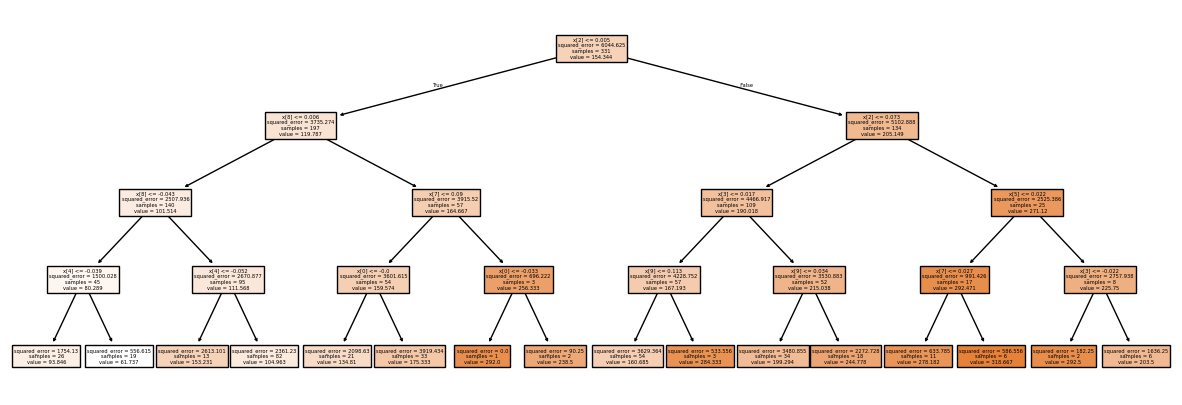

In [106]:
# visualise the tree
from sklearn import tree
plt.figure(figsize=(15, 5))
tree.plot_tree(decision_tree_reg, filled=True)

In [101]:
# make prediction
y_pred = decision_tree_reg.predict(X_test)
y_pred

array([175.33333333, 199.29411765, 175.33333333, 244.77777778,
       104.96341463, 104.96341463, 203.5       , 244.77777778,
       134.80952381, 160.68518519, 104.96341463, 175.33333333,
        93.84615385, 244.77777778, 104.96341463, 160.68518519,
       160.68518519, 203.5       , 199.29411765, 199.29411765,
       160.68518519, 104.96341463,  61.73684211, 199.29411765,
       160.68518519, 199.29411765, 199.29411765, 104.96341463,
        61.73684211, 104.96341463, 292.5       ,  61.73684211,
       160.68518519, 175.33333333, 160.68518519, 203.5       ,
       104.96341463, 134.80952381, 175.33333333,  61.73684211,
        61.73684211, 104.96341463, 153.23076923, 175.33333333,
       175.33333333,  61.73684211,  61.73684211, 104.96341463,
        61.73684211, 134.80952381, 160.68518519,  61.73684211,
       160.68518519, 104.96341463, 292.        , 160.68518519,
       104.96341463, 199.29411765, 104.96341463, 104.96341463,
       160.68518519, 160.68518519, 160.68518519, 104.96

In [102]:
# check for accuracy
from sklearn.metrics import r2_score
r2_score(y_pred=y_pred, y_true=y_test)

0.3401160233054985

The r2 score is low here but it can be increased by using hyperparameter tuning later